In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RLS:
    def __init__(self, x_dim=1, alpha=1, fit_intercept=True, t=None, P=None):
        '''
        x_dim: Dimension of input vector
        alpha: Forgetting factor
        fit_intercept: Whether to calculate the intercept for this model.
        t: Model parameter vector
        P: Covariance matrix        
        K: Gain
        '''
        self.x_dim = x_dim
        self.alpha = alpha
        self.fit_intercept = fit_intercept
        if self.fit_intercept:
            x_dim += 1
        self.t = t if t is not None else np.zeros((x_dim, 1))
        self.P = P if P is not None else np.identity(x_dim)
        self.K = None
        
    def step(self, x, y):
        assert x.size == self.x_dim
        '''
        x (numpy array): input data
        y (float): output data
        '''              
        if self.fit_intercept:
            x = np.append(x, [[1]], axis=0)

        self.K = self.get_K(x, self.P, alpha=self.alpha)
        self.t = self.get_t(self.t, x, y, self.K)
        self.P = self.get_P(x, self.P, alpha=self.alpha)
        
        out = self.t.flatten()
        if self.fit_intercept:
            return {'coef': out[:-1], 'intercept': out[-1]}
        else:
            return {'coef': out, 'intercept': 0}
        
    def get_K(self, x, P, alpha=1):
        K = np.dot(P, x) / (alpha + np.dot(np.dot(x.T, P), x))
        return K
    
    def get_t(self, t, x, y, K):
        t = t + np.dot(K, y - np.dot(t.T, x))
        return t
    
    def get_P(self, x, P, alpha=1):
        P = P - np.dot(P, np.dot(x, np.dot(x.T, P))) / (alpha + np.dot(x.T, np.dot(P, x)))
        return P / alpha

### Data

In [3]:
np.random.seed(0)

a_true = 2
b_true = 0
noise = 5
alpha = 0.99
power = 0.7

n = 200
ts = np.linspace(0, 100, num=n)
ns = noise * 2 * (np.random.rand(n) - 0.5)
ys = a_true * ts**power + ns + b_true

### Run

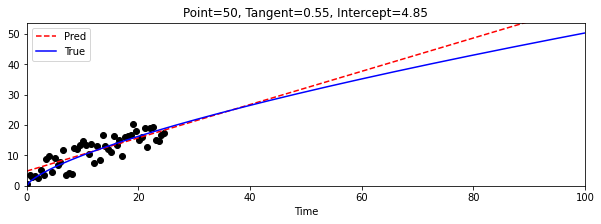

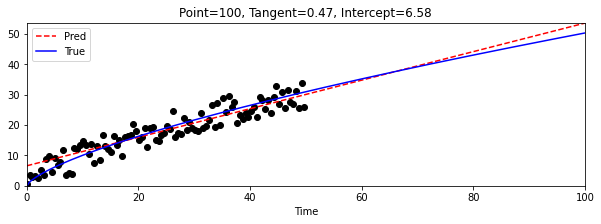

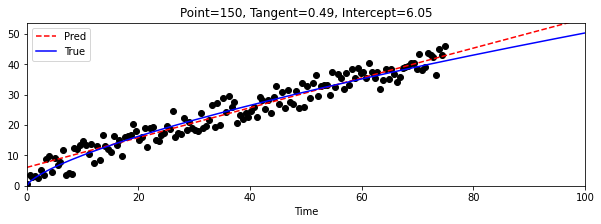

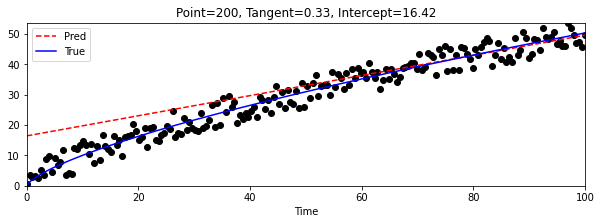

In [4]:
_a = [0]
_b = [0]
_y = np.array([])
_t = np.array([])
P  = np.identity(2)
rls = RLS(x_dim=1, alpha=0.95, fit_intercept=True, t=None, P=None)

for t, y in zip(ts, ys):
    x = np.array([[t]])
    o = rls.step(x, y)
    
    _a.append(o['coef'][0])
    _b.append(o['intercept'])
    
    _t = np.append(_t, t)
    _y = np.append(_y, y)
    yp = ts * _a[-1] + _b[-1]    
    if len(_t) % 50 == 0:
        plt.figure(figsize=(10, 3))
        plt.title(f'Point={len(_t)}, Tangent={_a[-1]:.2f}, Intercept={_b[-1]:.2f}')
        plt.plot(ts, yp, color='r', ls='--', label='Pred')
        plt.plot(ts, a_true*ts**power+b_true, color='b', label='True')
        plt.scatter(_t, _y, color='k')
        plt.legend()
        plt.xlabel('Time')
        plt.xlim(0, np.max(ts))
        plt.ylim(0, np.max(ys))
        plt.show()